In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import os
import pickle

In [2]:
data = pd.read_csv('Maternal Health Risk Data Set.csv')

In [3]:
X = data.drop('RiskLevel', axis=1)  
y = data['RiskLevel']  
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = RandomForestClassifier().fit(X_train, y_train)

In [5]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8078817733990148


In [6]:
f1_weighted = f1_score(y_test, y_pred, average='weighted')
precision_weighted = precision_score(y_test, y_pred, average='weighted')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

print("Weighted F1 Score:", f1_weighted)
print("Weighted Precision:", precision_weighted)
print("Weighted Recall:", recall_weighted)

Weighted F1 Score: 0.8080281510536584
Weighted Precision: 0.814836088449282
Weighted Recall: 0.8078817733990148


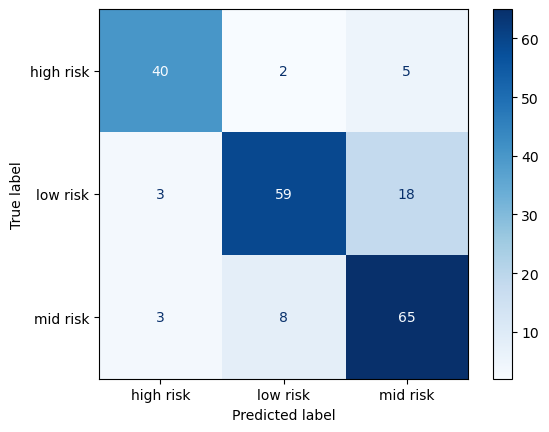

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")

In [8]:
model_filename = os.path.splitext('mat_health_risk_rf.ipynb')[0] + '.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)